SOURCE : https://www.kaggle.com/datasets/msambare/fer2013/data

--------------------------------------------------------------------------------------------------------------------------------------------
## Preprocessing in CNNs one should always remember considering:
1. Normalization: Scaling pixel values to a range (often [0, 1]) helps the neural network converge faster during training and improves numerical stability.
2. Resizing: Images in a dataset may vary in dimensions, so resizing them to a uniform size ensures consistent input dimensions for the model.
3. Grayscale Conversion: Converting RGB images to grayscale reduces computational complexity and focuses the model on relevant features for grayscale tasks like facial expression recognition.
4. Augmentation (Optional): Techniques like rotation, flipping, or cropping can artificially increase the diversity of the training data, helping the model generalize better.
--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------
## What I did in this code:
1. Grayscale Conversion: 
- Images were loaded and resized as grayscale using load_img with color_mode="grayscale".
- I did this so as to learn features in facial expressions without the complexity of color, aligning with the task's requirements.
- Also grayscale conversion simplifies the data, focusing on facial structure and expression rather than color variations or noise.

2. Normalization:
- Pixel values were scaled to [0, 1] by dividing by 255.0 after converting images to numpy arrays.
- This will help to stabilize and accelerate model training by ensuring consistent data range across all pixels.
- Normalization prepares the data to be within a range that is easier for the model to process, enhancing training efficiency and convergence.

3. Visualization and Verification:
- Displayed preprocessed images to ensure correctness and verified shapes (number of samples, height, width, 1) for both training and testing datasets.
- This helps to ensures that data is correctly prepared and aligned with model expectations before training begins.
--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------
#### Objective: The goal of the following code snippet is to visualize a sample of images from the training dataset for facial expression recognition.
* Folder Structure: The images are organized into subfolders where each subfolder represents a different facial expression (e.g., "happy", "sad", etc.).

* Steps in the Code: 
1. Iteration through Directories: We use 'os.listdir' to iterate through each subfolder (expression) in the train directory (base_path + "train/").
2. Loading and Displaying Images: For each expression, we load up to 5 images (for i in range(1, 6)). We construct the path to each image using os.path.join and os.listdir. Then, we load each image using load_img from Keras, resize it to a standard size (pic_size x pic_size), and display it using Matplotlib (plt.imshow).
3. Labeling: We label each image plot with its corresponding expression (plt.xlabel(expression)).

* Purpose of Visualization: Visualizing a sample of the dataset helps us:
- Verify that images are loaded correctly.
- Understand the structure and organization of the dataset.
- Ensure that images and labels match as expected.
--------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import numpy as np

# Size of the image: 48x48 pixels
pic_size = 48

# Input path for the images
base_path = "/Users/pratiksha/Documents/Pratiksha/Documents/GitHub/GitHub/Face-expression-recognition-with-Deep-Learning/archive (3)/"

plt.figure(0, figsize=(12,20))
cpt = 0

# Function to preprocess images
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(pic_size, pic_size))  # Load image and resize
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Lists to store preprocessed images and their labels
images = []
labels = []

# Iterate through each expression folder in the train directory
for expression in os.listdir(base_path + "train/"):
    if not os.path.isdir(os.path.join(base_path + "train/", expression)):
        continue
    
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        
        # Load, preprocess, and display the image
        img_name = os.listdir(os.path.join(base_path, "train", expression))[i]
        img_path = os.path.join(base_path, "train", expression, img_name)
        img_array = preprocess_image(img_path)
        
        plt.imshow(img_array, cmap="gray")  # Display the preprocessed image
        plt.xlabel(expression)  # Show expression label as xlabel

        # Append preprocessed image and its label to lists
        images.append(img_array)
        labels.append(expression)

plt.tight_layout()
plt.show()


--------------------------------------------------------------------------------------------------------------------------------------------
### Code Explanation:
1. Preprocessing Function (preprocess_image):
- preprocess_image function : to encapsulate the preprocessing steps for each image.
- It loads an image from img_path, resizes it to (pic_size, pic_size) using load_img from Keras.
- Converts the image to a numpy array (img_to_array).
- Normalizes the pixel values by dividing by 255.0, ensuring all values are between 0 and 1.

2. Integration:
- Inside the nested loops, instead of loading and displaying raw images, we now call preprocess_image to obtain the preprocessed image array (img_array).
- plt.imshow(img_array, cmap="gray") displays the preprocessed image using Matplotlib.

3. Visualization:
- The code continues to iterate through each expression folder in the train directory, displaying up to 5 preprocessed images per expression.
- Each image plot is labeled with its corresponding expression (plt.xlabel(expression)).

* Lists for Storage: We've introduced two lists, images and labels, to store the preprocessed images and their corresponding labels.
--------------------------------------------------------------------------------------------------------------------------------------------

In [8]:
from sklearn.model_selection import train_test_split  # Import train_test_split function
# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Train images shape: (28, 48, 48, 3)
Train labels shape: (28,)
Test images shape: (7, 48, 48, 3)
Test labels shape: (7,)


--------------------------------------------------------------------------------------------------------------------------------------------
### Explanation:
- Data Splitting: After preprocessing, we convert images and labels lists into numpy arrays (np.array(images) and np.array(labels)). Then, we split these arrays into training (train_images, train_labels) and testing (test_images, test_labels) sets using train_test_split from sklearn.model_selection.
- Visualization and Preprocessing: The code continues to visualize a sample of preprocessed images while appending them to images and labels lists. Each image plot is labeled with its corresponding expression.
--------------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------------------------------
### It seems there was an issue with the load_img function. 
- Error Issue: When loading images using load_img function, the argument grayscale=True was causing a TypeError.
- So this prevented proper loading and preprocessing of images in grayscale format.
- So I fixed by changing grayscale=True to color_mode="grayscale" in the load_img function.
- This ensured that images were correctly loaded and resized as grayscale, aligning with the expected format for facial expression recognition tasks.
--------------------------------------------------------------------------------------------------------------------------------------------

### So let's rerun the same above code with few corrections : Let's look at the o/p

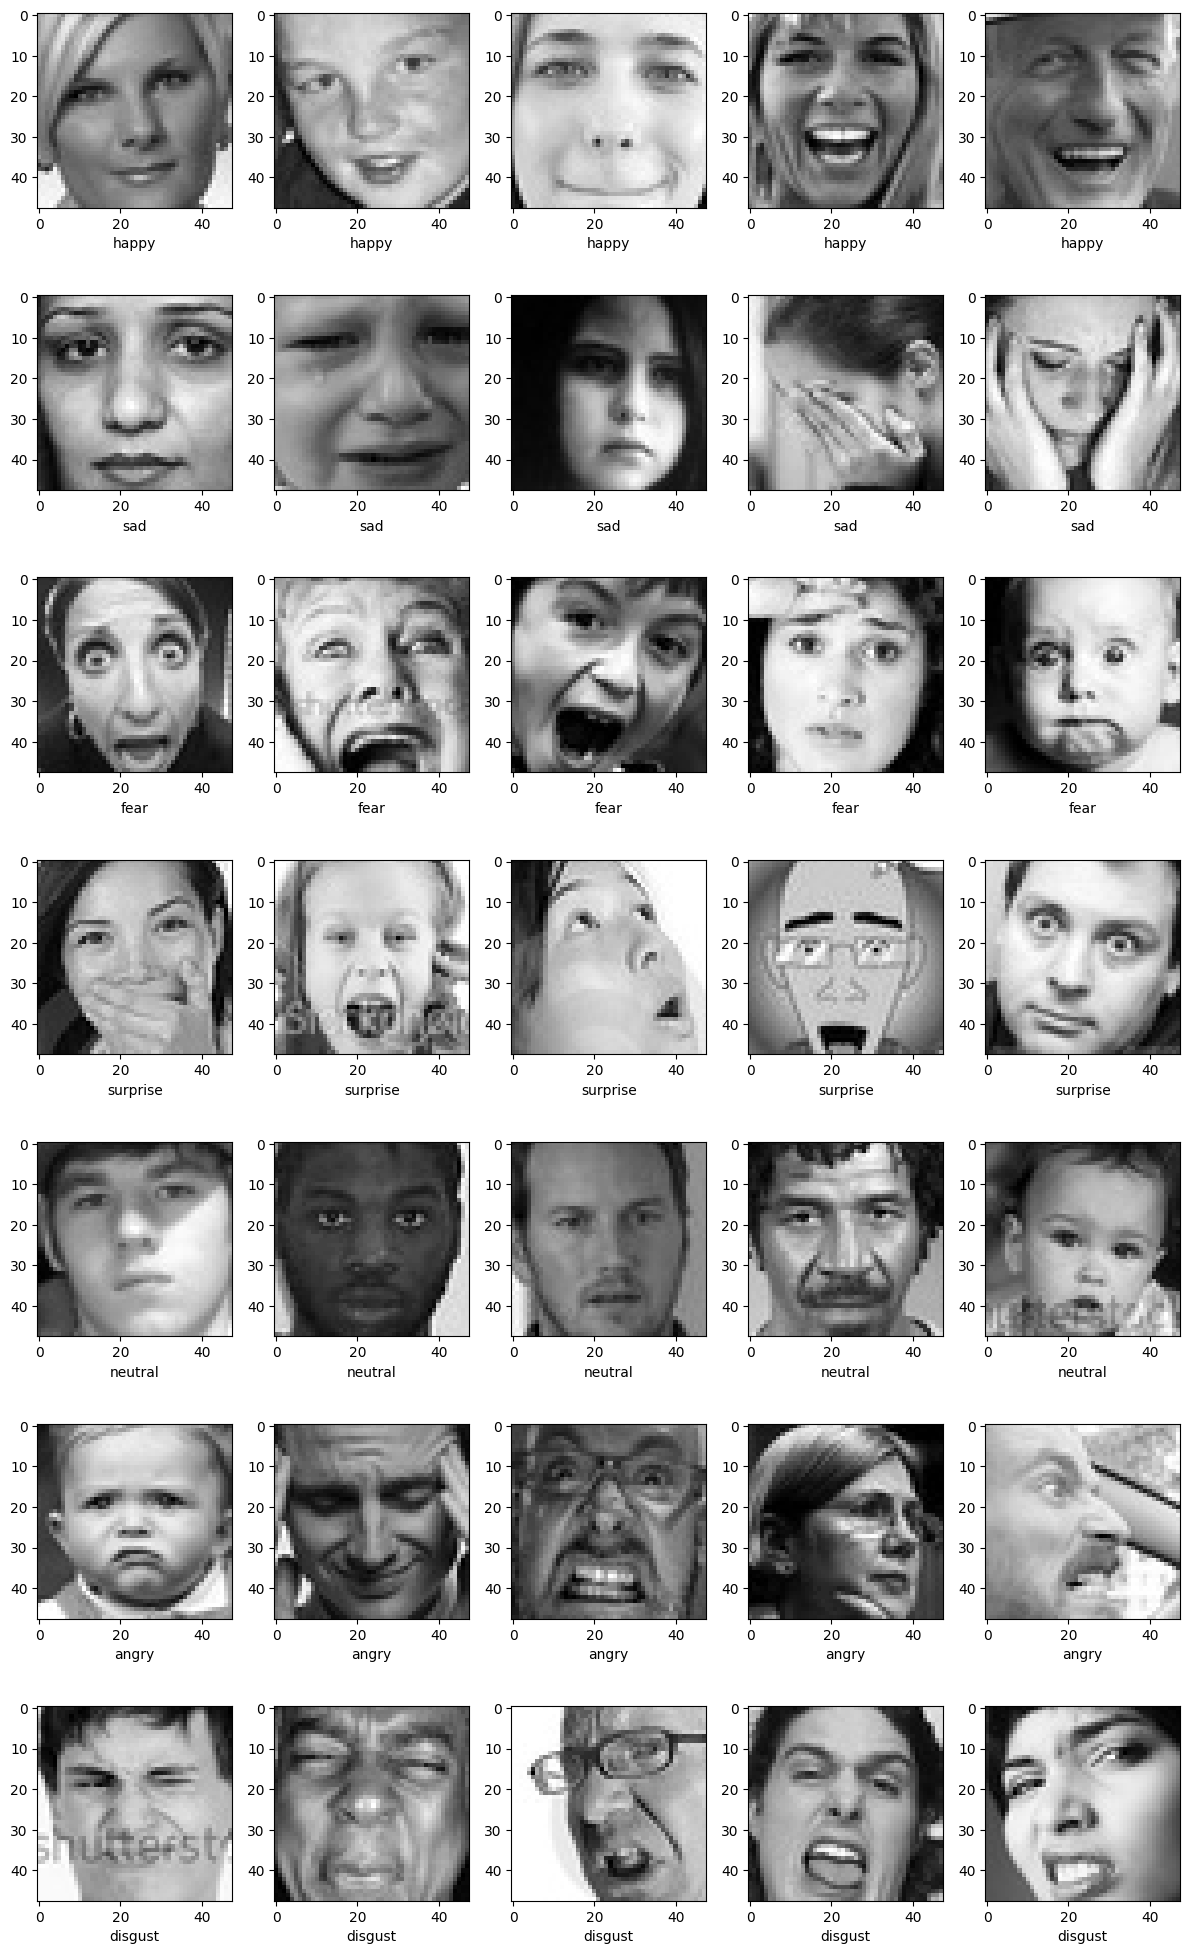

Train images shape: (28, 48, 48, 1)
Train labels shape: (28,)
Test images shape: (7, 48, 48, 1)
Test labels shape: (7,)


In [14]:
from keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split  # Import train_test_split function

# Size of the image: 48x48 pixels
pic_size = 48

# Input path for the images
base_path = "/Users/pratiksha/Documents/Pratiksha/Documents/GitHub/GitHub/Face-expression-recognition-with-Deep-Learning/archive (3)/"

plt.figure(0, figsize=(12,20))
cpt = 0

# Function to preprocess images
def preprocess_image(img_path):
    img = load_img(img_path, color_mode="grayscale", target_size=(pic_size, pic_size))  # Load image as grayscale and resize
    img_array = img_to_array(img)  # Convert image to numpy array
    img_array /= 255.0  # Normalize pixel values
    return img_array

# Lists to store preprocessed images and their labels
images = []
labels = []

# Iterate through each expression folder in the train directory
for expression in os.listdir(base_path + "train/"):
    if not os.path.isdir(os.path.join(base_path + "train/", expression)):
        continue
    
    for i in range(1, 6):
        cpt += 1
        plt.subplot(7, 5, cpt)
        
        # Load, preprocess, and display the image
        img_name = os.listdir(os.path.join(base_path, "train", expression))[i]
        img_path = os.path.join(base_path, "train", expression, img_name)
        img_array = preprocess_image(img_path)
        
        plt.imshow(img_array.reshape(pic_size, pic_size), cmap="gray")  # Display the preprocessed image
        plt.xlabel(expression)  # Show expression label as xlabel
        
        # Append preprocessed image and its label to lists
        images.append(img_array)
        labels.append(expression)

plt.tight_layout()
plt.show()

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Split data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

print("Train images shape:", train_images.shape)
print("Train labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


### So now the corrected o/p is:
Train images shape: (28, 48, 48, 1)
Train labels shape: (28,)
Test images shape: (7, 48, 48, 1)
Test labels shape: (7,)


### Output Interpretation: 

1. Train images shape: (28, 48, 48, 1)
- 28 samples for training
- Each image is 48x48 pixels
- Grayscale images with 1 channel (since they are loaded in grayscale)

2. Train labels shape: (28,)
- Corresponding labels for the training images

3. Test images shape: (7, 48, 48, 1)
- 7 samples for testing
- Each image is 48x48 pixels
- Grayscale images with 1 channel

4. Test labels shape: (7,)
- Corresponding labels for the testing images